In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic - ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Display the structure of the dataset
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


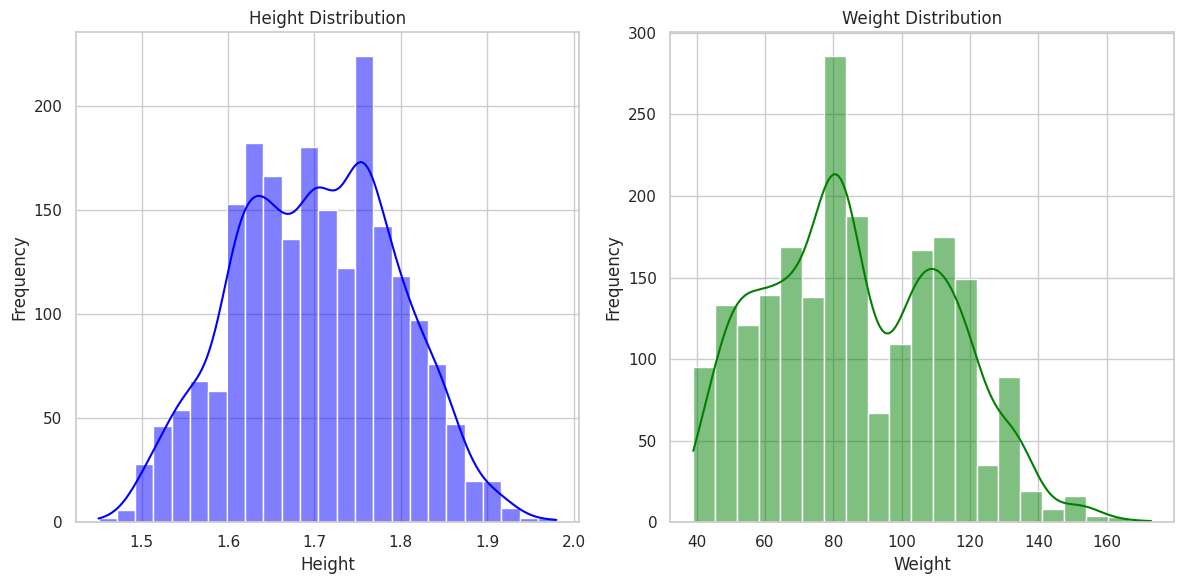

<ipython-input-5-5524b580b011>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Weight', data=top_10_ages, palette='viridis')


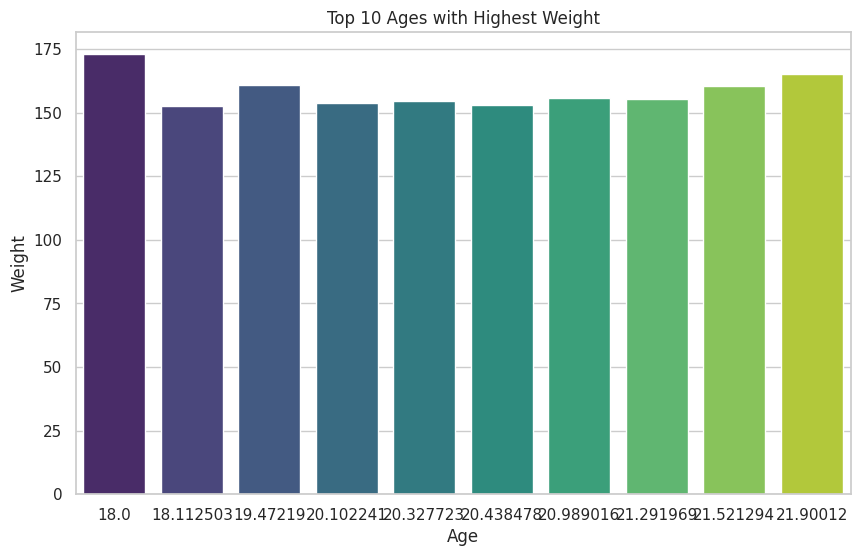

<ipython-input-5-5524b580b011>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CAEC', data=data, palette='magma')


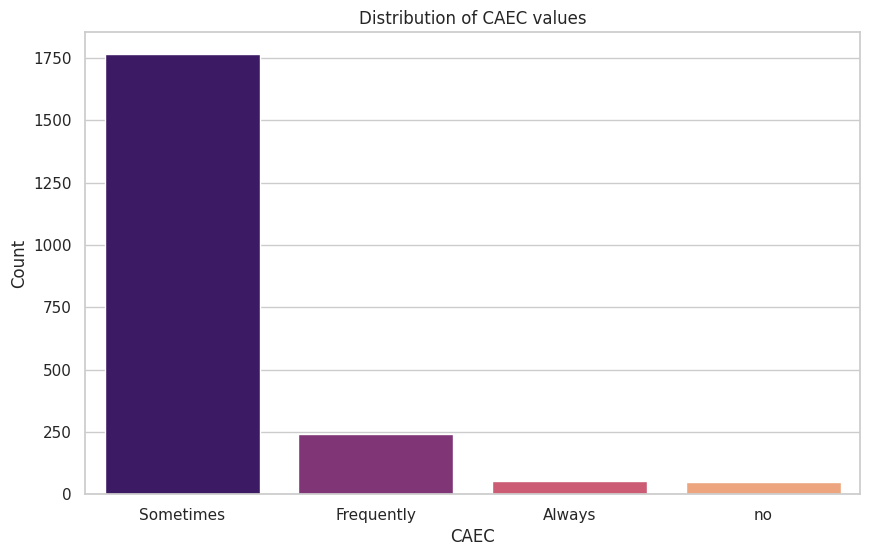

<ipython-input-5-5524b580b011>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='family_history_with_overweight', y='Age', data=average_age_family_history, palette='coolwarm')


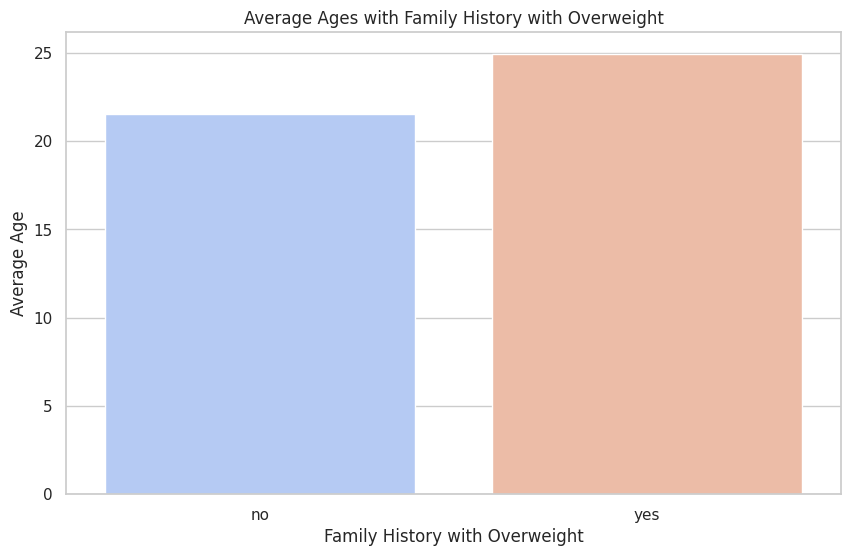

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# 1. Height and Weight Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Height'], kde=True, color='blue')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Weight'], kde=True, color='green')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Top 10 Ages with Highest Weight
top_10_ages = data.nlargest(10, 'Weight')[['Age', 'Weight']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Weight', data=top_10_ages, palette='viridis')
plt.title('Top 10 Ages with Highest Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

# 3. Distribution of CAEC values
plt.figure(figsize=(10, 6))
sns.countplot(x='CAEC', data=data, palette='magma')
plt.title('Distribution of CAEC values')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.show()

# 4. Average Ages with Family History with Overweight
average_age_family_history = data.groupby('family_history_with_overweight')['Age'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='family_history_with_overweight', y='Age', data=average_age_family_history, palette='coolwarm')
plt.title('Average Ages with Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Average Age')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Redefine the categorical columns list since it was not included in the previous steps
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Reload the dataset to reset any previous modifications
data = pd.read_csv(file_path)

# Apply Label Encoding to categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Apply Standard Scaler to numerical columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Apply One-Hot Encoding to necessary columns, excluding the target variable
one_hot_columns = ['Gender', 'MTRANS']
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Split the data into features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting datasets
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

X_train_shape, X_test_shape, y_train_shape, y_test_shape


((1688, 19), (423, 19), (1688,), (423,))

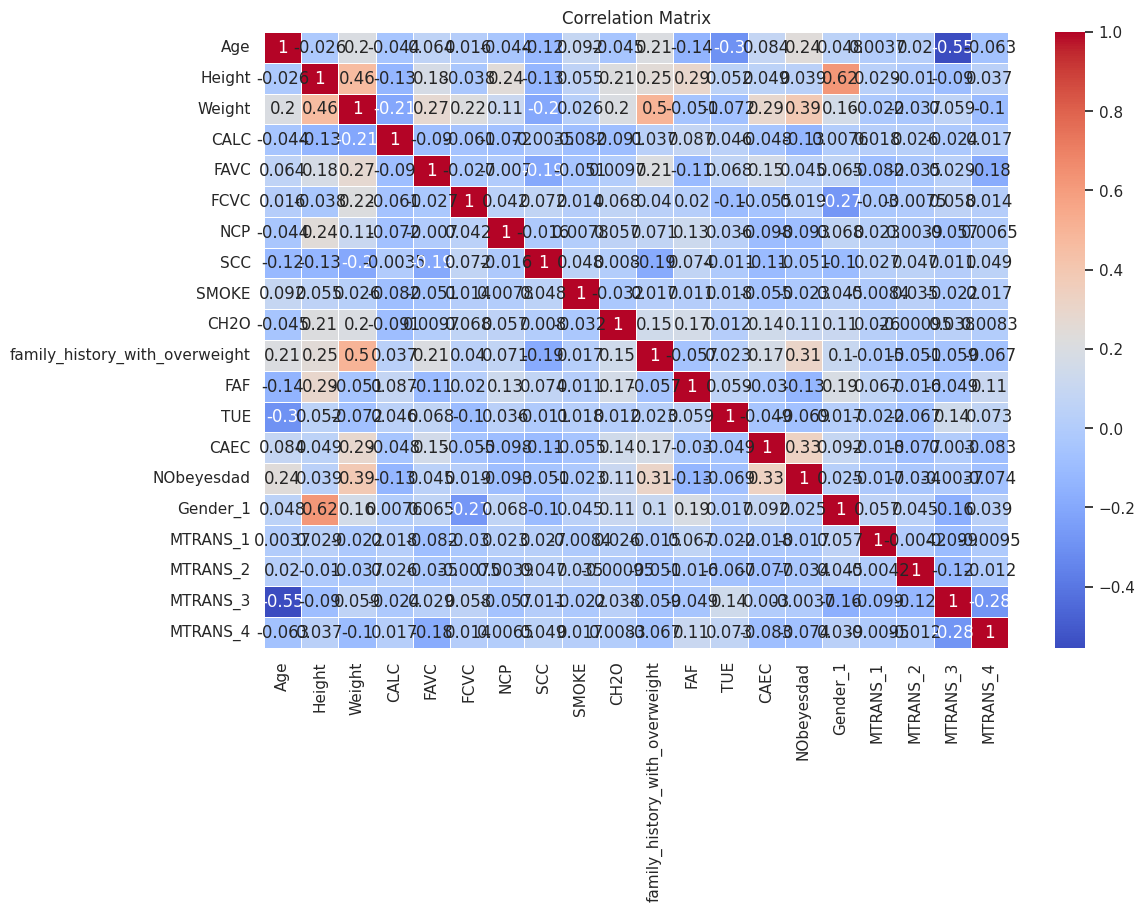

In [ ]:
# 5. Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

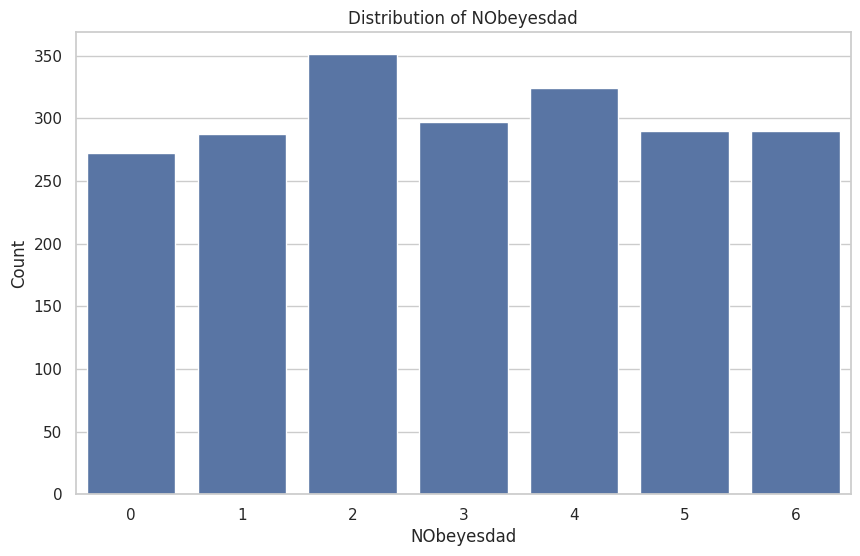

In [ ]:
# Re-import necessary libraries
import seaborn as sns

# Redefine the target variable 'y'
y = data['NObeyesdad']

# Check the distribution of the target variable with corrected plotting code
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Distribution of NObeyesdad')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.show()


#It is a Classification Problem

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
classification_report(y_test, y_pred_logreg)

(logreg_accuracy, logreg_classification_report)


(0.8794326241134752,
 '              precision    recall  f1-score   support\n\n           0       0.85      1.00      0.92        56\n           1       0.89      0.63      0.74        62\n           2       0.95      0.90      0.92        78\n           3       0.89      0.97      0.93        58\n           4       1.00      1.00      1.00        63\n           5       0.76      0.80      0.78        56\n           6       0.80      0.86      0.83        50\n\n    accuracy                           0.88       423\n   macro avg       0.88      0.88      0.87       423\nweighted avg       0.88      0.88      0.88       423\n')

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_classification_report = classification_report(y_test, y_pred_tree)

(tree_accuracy, tree_classification_report)


(0.9408983451536643,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.96      0.94        56\n           1       0.90      0.89      0.89        62\n           2       0.96      0.92      0.94        78\n           3       0.95      0.95      0.95        58\n           4       1.00      1.00      1.00        63\n           5       0.90      0.93      0.91        56\n           6       0.96      0.94      0.95        50\n\n    accuracy                           0.94       423\n   macro avg       0.94      0.94      0.94       423\nweighted avg       0.94      0.94      0.94       423\n')

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = random_forest.predict(X_test)

# Evaluate the model
forest_accuracy = accuracy_score(y_test, y_pred_forest)
forest_classification_report = classification_report(y_test, y_pred_forest)

(forest_accuracy, forest_classification_report)


(0.9527186761229315,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98        56\n           1       0.88      0.92      0.90        62\n           2       0.99      0.96      0.97        78\n           3       0.97      0.98      0.97        58\n           4       1.00      1.00      1.00        63\n           5       0.88      0.88      0.88        56\n           6       0.96      0.96      0.96        50\n\n    accuracy                           0.95       423\n   macro avg       0.95      0.95      0.95       423\nweighted avg       0.95      0.95      0.95       423\n')

SVM

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)

(svm_accuracy, svm_classification_report)


(0.9598108747044918,
 '              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95        56\n           1       1.00      0.82      0.90        62\n           2       1.00      0.96      0.98        78\n           3       0.97      1.00      0.98        58\n           4       1.00      1.00      1.00        63\n           5       0.89      0.98      0.93        56\n           6       0.96      0.96      0.96        50\n\n    accuracy                           0.96       423\n   macro avg       0.96      0.96      0.96       423\nweighted avg       0.96      0.96      0.96       423\n')

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_classification_report = classification_report(y_test, y_pred_knn)

(knn_accuracy, knn_classification_report)


(0.8226950354609929,
 '              precision    recall  f1-score   support\n\n           0       0.78      0.96      0.86        56\n           1       0.83      0.39      0.53        62\n           2       0.85      0.91      0.88        78\n           3       0.89      0.98      0.93        58\n           4       0.98      1.00      0.99        63\n           5       0.73      0.79      0.76        56\n           6       0.66      0.70      0.68        50\n\n    accuracy                           0.82       423\n   macro avg       0.82      0.82      0.80       423\nweighted avg       0.82      0.82      0.81       423\n')

##Best Performing Algo

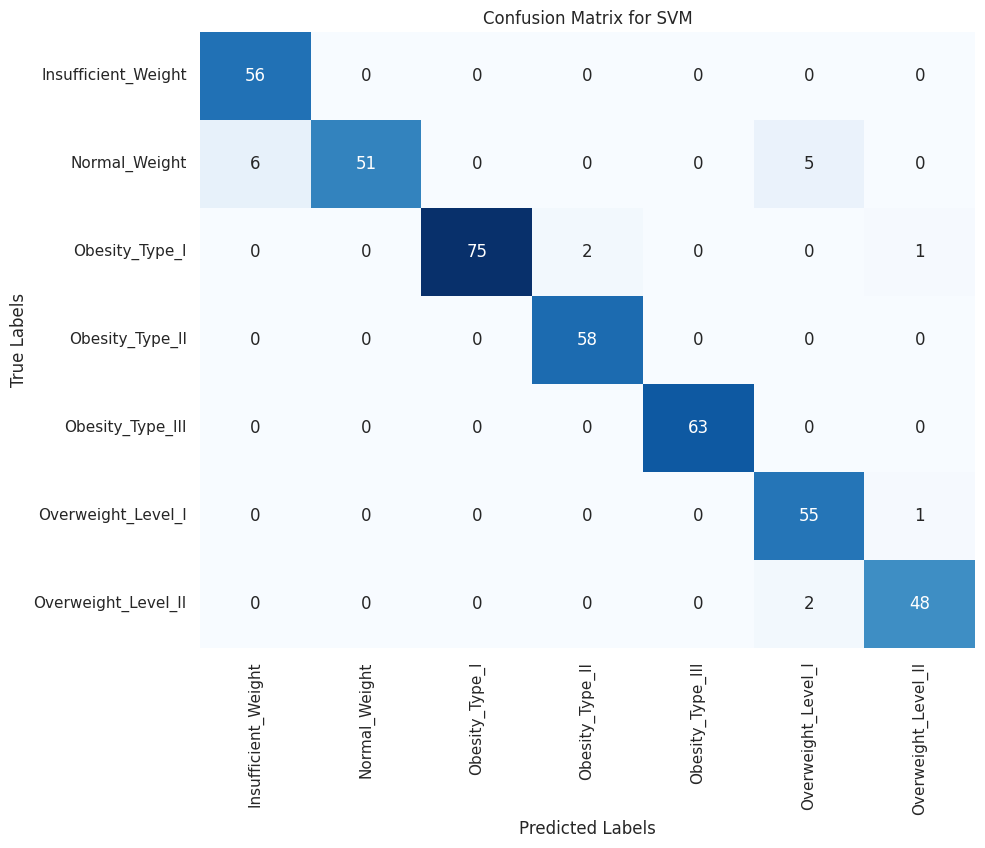

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the best algorithm (SVM)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Display the results for the best algorithm
best_algorithm_name = "Support Vector Machine (SVM)"
best_algorithm_report = svm_classification_report

(best_algorithm_name, best_algorithm_report)
# Plotting the colorful confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoders['NObeyesdad'].classes_,
            yticklabels=label_encoders['NObeyesdad'].classes_)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

